# Capstone 2: *National Transit Database*
## *Exploratory Data Analysis*
***

## 2.1 Table of Contents<a id='1.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Table of Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Data Dictionary](#2.3_Data_Dictionary)
  * [2.4 Importing the Dependencies](#2.4_Importing_the_Dependencies)
  * [2.5 Importing the Data](#2.5_Importing_the_Data)
  * [2.6 Data Storytelling](#2.6_Data_Storytelling)
      * [2.6.1 'Primary UZA Population' and 'Primary UZA Code'](#2.6.1_Primary_UZA_Population_and_Primary_UZA_Code)
      * [2.6.2 Distinct Values in Categorical Columns](#2.6.2_Distinct_Values_in_Categorical_Columns)
      * [2.6.3 Nashville Data](#2.6.3_Nashville_Data)
      * [2.6.4 Populations Similar to Nashville's](#2.6.4_Populations_Similar_to_Nashvilles)
      * [2.6.5 Next Largest Population with Light Rail](#2.6.5_Next_Largest_Population_with_Light_Rail)
  * [2.7 Refining the Dataframe](#2.7_Refining_the_Dataframe)
      * [2.7.1 Understanding the Totals Columns](#2.7.1_Understanding_the_Totals_Columns)
      * [2.7.2 Removing Unneeded Data](#2.7.2_Removing_Unneeded_Data)
  * [2.8 Exploring Relationships](#2.8_Exploring_Relationships)
      * [2.8.1 A Broad Look](#2.8.1_A_Broad_Look)
      * [2.8.2 Realtionship between Mode and Total Collisions, Fatalities, and Injuries](#2.8.2_Relationship_between_Mode_and_Total_Collisions_Fatalities_and_Injuries)
      * [2.8.3 Relationship between Features for Nashville Specifically](#2.8.3_Relationship_between_Features_for_Nashville_Specifically)
  * [2.9 Save Data](#2.9_Save_Data)
  * [2.10 Summary](#2.10_Summary)
  

## 2.2 Introduction
<a id='2.2_Introduction'></a>

The Nashville Metropolitan Area in Tennessee is in such a situation.  They built a 2.1 million square foot convention center in 2013 to host both local and international events but have limited public transportation options available between the two.  Nashville is considering adding another mode of transportation between the two to help reduce the pressure on the congested roadways.  They would like to know from a safety standpoint what mode(s) of transportation would be the most desirable.

## 2.3 Data Dictionary
<a id='2.3_Data_Dictionary'></a>
**The data dictionary is repeated in this notebook for ease of referencing**

**Note:** *This table contains only the columns which benefitted from further explanation.  For a complete list of columns, please refer to section 1.5 of this notebook.*



| Column Name | Definition      [NTD Glossary link](https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary)|
|:---------|:-------------|
|5 DIgit NTD ID|National Transit Database ID number currently in use|
|4 Digit NTD ID|Legacy ID number|
|Agency| Name of the Reporting Agency|
|Organization Type|Distinguishes between government, private, and independent public agencies|
|Mode|AR: Alaska Railroad|
|[Mode Definitions](https://www.ftis.org/iNTD-Urban/modes.pdf)|CB: Commuter Bus|
||CC: Cable Car|
||CR: Commuter Rail
||DR: Demand Response|
||FB: Ferryboat|
||HR: Heavy Rail|
||IP: Inclined Plane|
||LR: Light Rail|
||MB: Bus|
||MG: Monorail and Automated Guideway|
||PB: Publico|
||RB: Bus Rapid Transit|
||SR: Streetcar Rail|
||TB: Trolleybus|
||TR: Aerial Tramway|
||VP: Vanpool|
||YR: Hybrid Rail
|Type of Service|DO: Directly Operated|
||PT: Purchased Transportation|
||TX: Taxi|
||TN: Transit Network Company (new TOS effective Sept 2019) [NTD Guidance](https://www.transit.dot.gov/sites/fta.dot.gov/files/docs/NTD%202108%20FRN%20Webinar%20Presentation.pdf)|
|Primary UZA Code|*(see note below table)* Numerical ranking by urbanized area population size| 
|Primary UZA Name|*(see note below table)*|
|Primary UZA Sq Miles|*(see note below table)*|
|Primary UZA Population|*(see note below table)*|


**Urbanized Area (UZA):** An urbanized area is an incorporated area with a population of 50,000 or more that is designated as such by the U.S. Department of Commerce, Bureau of the Census.
The Census Bureau delineates urban areas after each decennial census by applying specified criteria to decennial census and other data.

**Non-Rail Modes:**
Transit modes whose vehicles typically operate on roadways - streets, highways or expressways, but may also operate on waterways (ferryboat (FB)) or via aerial cable (aerial tramways (TR)). Vehicles are typically powered by motors onboard the vehicle, with one exception, aerial tramway (TR) vehicles which are electrically powered by a motor not onboard the vehicle in order to pull the vehicle via an overhead cable. 
1.   Aerial Tramway (TR)
2.   Bus (MB)
3.   Bus rapid transit (RB)
4.   Commuter bus (CB)
5.   Demand Response (DR)
6.   Demand taxi (DT)
7.   Ferryboat (FB)
8.   Jitney (JT)
9.   Publico (PB)
10.   Trolleybus (TB), and
11.   Vanpool (VP).


## 2.4 Importing the Dependencies
<a id='2.4_Importing_the_Dependencies'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import groupby

pd.set_option('display.max_rows', 70)

## 2.5 Importing the Data
<a id='2.5_Importing_the_Data'></a>

In [2]:
data = pd.read_csv("data_cleaned.csv", dtype={'4 Digit NTD ID': str})

In [3]:
data.shape

(133148, 65)

## 2.6 Data Storytelling
<a id='2.6_Data_Storytelling'></a>

In [4]:
data.describe()

,5 DIgit NTD ID,Primary UZA Code,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year,Month,Vehicles,Vehicle Revenue Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
count,133148.000000,133148.000000,133148.000000,1.331480e+05,133148.000000,1.331480e+05,133148.000000,133148.000000,133148.000000,1.331480e+05,...,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000,133148.000000
mean,48006.426578,111.814064,677.537222,2.550420e+06,660.506113,1.014378e+06,2017.765119,6.326426,78.786035,2.502225e+05,...,0.009854,0.008359,0.000278,0.002358,0.137832,0.005115,0.005062,0.005212,0.176781,0.624133
std,27840.547070,126.742341,858.126688,4.341494e+06,1263.736992,1.818071e+06,2.458555,3.448196,240.113964,9.974970e+05,...,0.133727,0.111647,0.018382,0.057698,0.912684,0.090459,0.132812,0.101820,1.108234,3.485217
min,1.000000,0.000000,11.000000,5.124000e+04,1.000000,1.000000e+00,2014.000000,1.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30027.000000,13.000000,92.000000,2.097030e+05,75.000000,1.548550e+05,2016.000000,3.000000,9.000000,2.076675e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50006.000000,56.000000,304.000000,6.432600e+05,251.000000,3.421420e+05,2018.000000,6.000000,22.000000,6.035350e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70006.000000,170.000000,905.000000,2.956746e+06,688.000000,9.491130e+05,2020.000000,9.000000,54.000000,1.652578e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99425.000000,602.000000,3450.000000,1.835130e+07,15355.000000,1.835130e+07,2022.000000,12.000000,5413.000000,3.083597e+07,...,10.000000,6.000000,2.000000,6.000000,51.000000,9.000000,11.000000,7.000000,54.000000,118.000000


### 2.6.1 'Primary UZA Population' and 'Primary UZA Code'
<a id='2.6.1_Primary_UZA_Population_and_Primary_UZA_Code'></a>
**Part 1: Is there exactly one value for 'Primary UZA Population' for each 'Primary UZA Code'?**


In [5]:
u = data.groupby('Primary UZA Code')['Primary UZA Population'].nunique()
u[data.groupby('Primary UZA Code')['Primary UZA Population'].nunique() != 1]


Primary UZA Code
0    154
Name: Primary UZA Population, dtype: int64

There is exactly one 'Primary UZA Population' for each 'Primary UZA Code' except where the "Primary UZA Code' is zero.  A look at the [NTD Website](https://datahub.transportation.gov/Public-Transit/Monthly-Modal-Time-Series/5ti2-5uiv/data) confirms zero is a placeholder and not an assigned code, so I will replace the zeros with data from elsewhere in the dataframe where it is available.

In [6]:
#replacing zeros with nans
data['Primary UZA Code'].replace(0, np.nan, inplace=True)

#Filling the nans with appropriate data
first = data.groupby('Primary UZA Population')['Primary UZA Code'].first()
data['Primary UZA Code'] = data['Primary UZA Code'].fillna(data['Primary UZA Population'].map(first))
if data['Primary UZA Code'].isnull().sum() == 0:
    print("All 'Primary UZA Code' fields which formerly equaled zero have now been filled with appropriate data.")

All 'Primary UZA Code' fields which formerly equaled zero have now been filled with appropriate data.


In [7]:
# check that there is a one to one relationship
u = data.groupby('Primary UZA Code')['Primary UZA Population'].nunique()
u[data.groupby('Primary UZA Code')['Primary UZA Population'].nunique() != 1]


Series([], Name: Primary UZA Population, dtype: int64)

Now there is exactly one value of 'Primary UZA Population' for each 'Primary UZA Code.'

**Part 2: Are the 'Primary UZA Code's ordered by population size?**

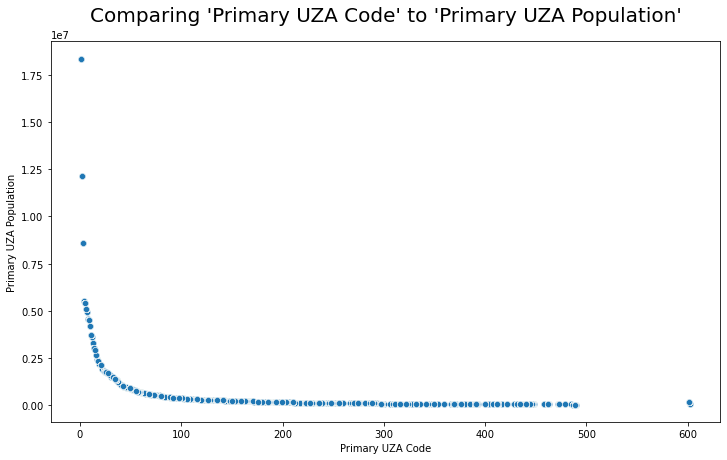

In [8]:
#plot UZA Code and Population to see if they both increase together as expected

plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=data['Primary UZA Code'], y=data['Primary UZA Population'] )
ax.set_title("Comparing 'Primary UZA Code' to 'Primary UZA Population'", fontsize=20, pad=20)
plt.show()

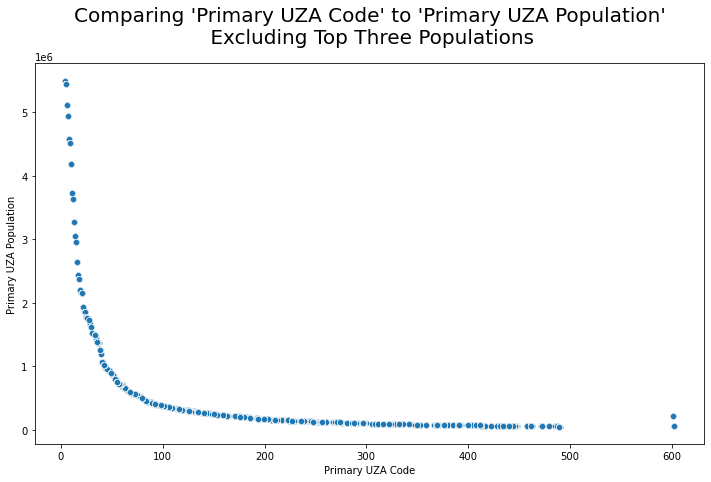

In [9]:
#look at the same plot excluding the top three

subset = data.loc[data['Primary UZA Code']> 3]

plt.figure(figsize=(12,7))

ax = sns.scatterplot(x=subset['Primary UZA Code'], y=subset['Primary UZA Population'] )
ax.set_title("Comparing 'Primary UZA Code' to 'Primary UZA Population'\n Excluding Top Three Populations", fontsize=20, pad=20)
plt.show()

In [10]:
temp = data.loc[data['Primary UZA Code']>500, ['5 DIgit NTD ID','Primary UZA Code', 'Primary UZA Population']]
temp.drop_duplicates()


,5 DIgit NTD ID,Primary UZA Code,Primary UZA Population
36807,91092,601.0,210000.0
114126,60015,602.0,54770.0


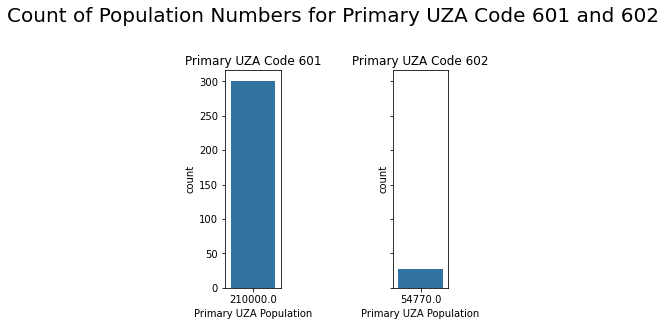

In [11]:

six_o_one = data.loc[data['Primary UZA Code']==601, ['5 DIgit NTD ID', 'Primary UZA Code', 'Primary UZA Population']]
six_o_two = data.loc[data['Primary UZA Code']==602, ['5 DIgit NTD ID', 'Primary UZA Code', 'Primary UZA Population']]

fig, ax =plt.subplots(1,2, figsize=(4,4), sharey=True)
fig.suptitle('Count of Population Numbers for Primary UZA Code 601 and 602', fontsize=20, y=1.1)
# Adjust the subplot layout parameters
fig.subplots_adjust(wspace=2)

sns.countplot(x='Primary UZA Population', data=six_o_one, ax=ax[0])
ax[0].set_title('Primary UZA Code 601')
sns.countplot(x='Primary UZA Population', data=six_o_two, ax=ax[1])
ax[1].set_title('Primary UZA Code 602')
print("")

It appears that the 'Primary UZA Code' and the 'Primary UZA Population' have and inverse relationship except where 'Primary UZA Code' equals 602.  There is also a large gap in the 'Primary UZA Code's.  We can see from the countplot above that 'Primary UZA Code's 601 and 602, which are the only two numbers after the large gap, contain only one value each for 'Primary UZA Population', so their population values do not seem to be an error.  The two outliers in the 'Primary UZA Code's will need to be addressed.  One option would be to drop them both from the dataframe.  Another option would be to reorder and rename the 'Primary UZA Code' column incorporating these two.  'Primary UZA Code' can be used as is in certain cases where only a subset of codes is needed.

A little outside reasearch reveals that 602 is a non-UZA entity in Texas which happened to serve UZA 293.  That is the reason is was included in the dataframe.  Since non-UZA data is not useful for the purposes of this project, 602 can be removed from the dataframe.  [FTA Data for 602](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2017/60015.pdf)

Looking at the data from the FTA for 601, the reason for it's code designation still does not become clear. So, it will be left in the dataframe for now. [FTA Data for 601](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2019/91092.pdf)




### 2.6.2 Distinct Values in Categorical Columns
<a id='2.6.2_Distinct_Values_in_Categorical_Columns'></a>
**Part 1: How many distinct values are there in each categorical column?**

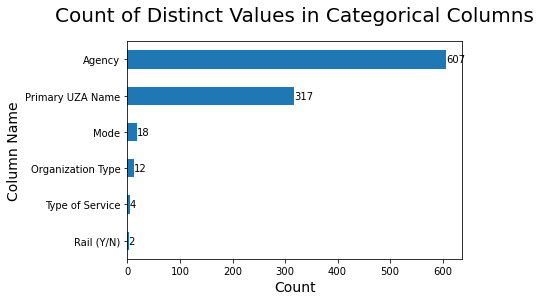

In [12]:
count = data[['Agency','Organization Type','Mode', 'Type of Service', 'Rail (Y/N)', 'Primary UZA Name']].nunique()

plt.figure(figsize=(6,4))
ax = count.sort_values(ascending=True).plot(kind='barh', fontsize=10)
ax.set_title('Count of Distinct Values in Categorical Columns', fontsize=20, pad=20)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Column Name', fontsize=14)
ax.bar_label(ax.containers[0])
print("")

With hundreds of distinct values in the 'Agency' and 'Primary UZA Name' columns it would not be feasible to assign each one a numerical value, thereby increasing the number of features by the number of values in each of those fields. Since it could possibly be an option for the lower four, it will be worth taking a closer look at the distribution of that data. 

**Part 2: What is the distribution of values for 'Mode', 'Organization Type', 'Type of Service', and 'Rail (Y/N)'?**

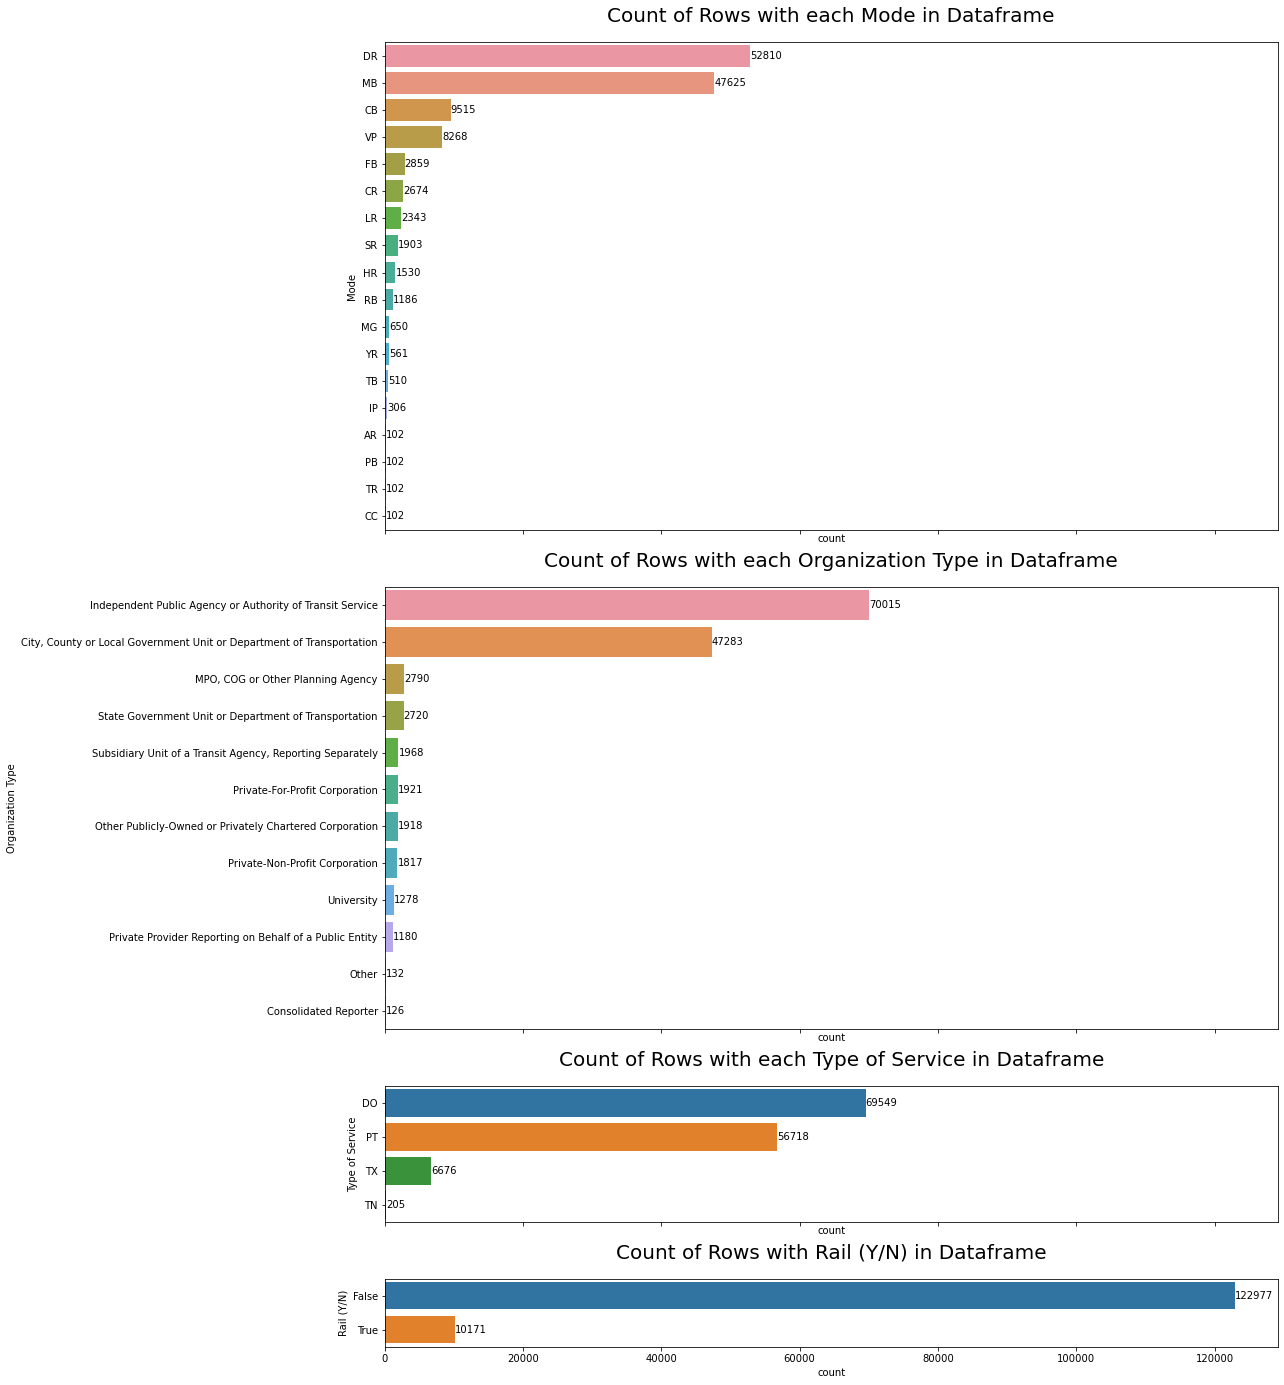

In [13]:
fig, ax =plt.subplots(4,1, figsize=(16,24), gridspec_kw={'height_ratios': [.43, .39, .12, .06]}, sharex=True)

sns.countplot(y=data['Mode'], ax=ax[0], order=data['Mode'].value_counts().index)
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Count of Rows with each Mode in Dataframe', fontsize=20, pad=20)

sns.countplot(y=data['Organization Type'], ax=ax[1], order=data['Organization Type'].value_counts().index)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Count of Rows with each Organization Type in Dataframe', fontsize=20, pad=20)

sns.countplot(y=data['Type of Service'], ax=ax[2], order=data['Type of Service'].value_counts().index)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_title('Count of Rows with each Type of Service in Dataframe', fontsize=20, pad=20)

sns.countplot(y=data['Rail (Y/N)'], ax=ax[3], order=data['Rail (Y/N)'].value_counts().index)
ax[3].bar_label(ax[3].containers[0])
ax[3].set_title('Count of Rows with Rail (Y/N) in Dataframe', fontsize=20, pad=20)
print("")


In [14]:
#Find earliest use of TN in the dataframe
temp = data[data['Type of Service']=='TN']
temp[['5 DIgit NTD ID', 'Agency','Mode', 'Month','Year','Type of Service']].sort_values(by=['Year', 'Month'], ascending=True).head(1)


,5 DIgit NTD ID,Agency,Mode,Month,Year,Type of Service
74102,90162,The Eastern Contra Costa Transit Authority,DR,7,2018,TN


The distribution of values within these four columns is uneven.  For each column, there are one or two values which occur far more often than others.  It it noteable that the there is far less data for rail transportation than there is for non-rail.

One note about the 'Type of Service' 'TN': The documention from NTD shows the new TOS designation "TN" came into use Sept 2019 but it first occurs in the database in July 2018.  Since this type of service was not in use for the entire life of the database, I will need to be cautions about how I use the data.  The lower number of occurrnaces does not reflect the proportion of rows after July 2018 which are in this category.  [New Type of Service: TN](https://www.federalregister.gov/documents/2019/04/09/2019-06943/national-transit-database-reporting-changes-and-clarifications)

### 2.6.3 Nashville Data
<a id='2.6.3_Nashville_Data'></a>
**Part 1: How many '5 DIgit NTD ID's and are associated with the Nashville area and how many rows of data are in the dataframe for them?**

In [15]:
# Which '5 DIgit NTD ID's service the Nashville Metropolitan Area and and how many rows of data are there?
# How many rows of data are available for the Nashville Metropolitan Area?

Nashville = data[data['Primary UZA Name'].str.contains('Nashville')]
Nashville_IDs = Nashville['5 DIgit NTD ID'].drop_duplicates()
print("There are", Nashville_IDs.shape[0], "'5 DIgit NTD ID's that service the Nashville area.")
print(Nashville_IDs)
print ('There are', Nashville[Nashville['5 DIgit NTD ID']== 40004].shape[0], 'rows of data for 40004')
print ('There are', Nashville[Nashville['5 DIgit NTD ID']== 40159].shape[0], 'rows of data for 40159')
print ('There are', Nashville[Nashville['5 DIgit NTD ID']== 40178].shape[0], 'rows of data for 40178')
print ('There are ', Nashville.shape[0], 'rows of data available in all for the Nashville area.')

There are 3 '5 DIgit NTD ID's that service the Nashville area.
7280    40178
8623    40004
9249    40159
Name: 5 DIgit NTD ID, dtype: int64
There are 342 rows of data for 40004
There are 306 rows of data for 40159
There are 102 rows of data for 40178
There are  750 rows of data available in all for the Nashville area.


**Part 2: What modes of transportation are associated with the Nashville area?**

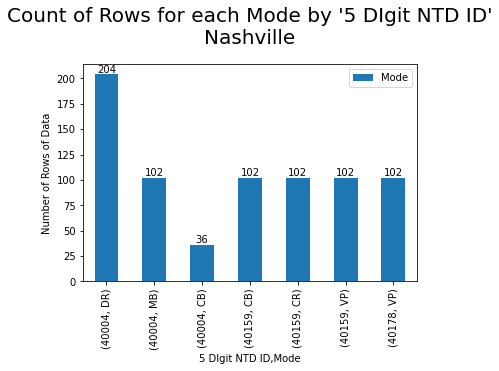

In [16]:
# What data is available for the different Modes in the Nashville Metropolitan Area?

ax = Nashville.groupby('5 DIgit NTD ID')['Mode'].value_counts().plot(kind='bar', legend=True)
ax.bar_label(ax.containers[0])
ax.set_title("Count of Rows for each Mode by '5 DIgit NTD ID'\nNashville", fontsize=20, pad=20)
ax.set_ylabel("Number of Rows of Data")
print("")

The dataframe reveals five different modes of transporation in the Nashville area.  CB and VP modes are each provided by two different agencies.

### 2.6.4 Populations Similar to Nashville's
<a id='2.6.4_Populations_Similar_to_Nashvilles'></a>
**Who has the next largest and next smallest population sizes compared to Nashville and what information is available for them?**

In [17]:
next_largest = data[data['Primary UZA Code']==45]
next_largest_unique = next_largest.groupby('5 DIgit NTD ID')['Agency'].first()
print('Next largest:', next_largest_unique)  


next_smallest = data[data['Primary UZA Code']==43]
next_smallest_unique = next_smallest.groupby('5 DIgit NTD ID')['Agency'].first()
print('\nNext smallest:', next_smallest_unique)    

Next largest: 5 DIgit NTD ID
30006    Greater Richmond Transit Company
Name: Agency, dtype: object

Next smallest: 5 DIgit NTD ID
40018                      Transit Authority of River City
40196    Kentuckiana Regional Planning and Development ...
Name: Agency, dtype: object


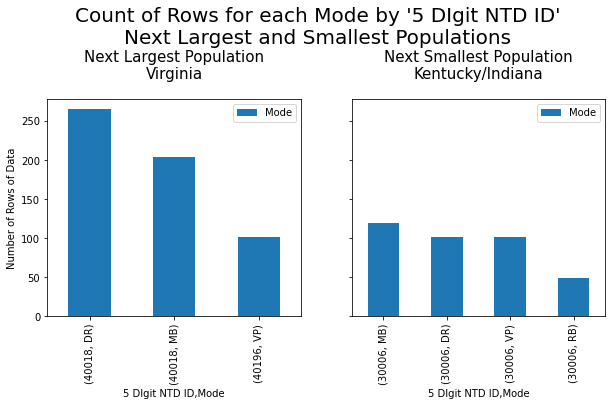

In [18]:
# What data is available for the next largest and next smallest population sizes?

fig, ax =plt.subplots(1,2,figsize=(10,4), sharey=True)
fig.suptitle("Count of Rows for each Mode by '5 DIgit NTD ID'\nNext Largest and Smallest Populations", fontsize=20, y=1.2)

data[data['Primary UZA Code']==43].groupby('5 DIgit NTD ID')['Mode'].value_counts().plot(kind='bar',legend=True, ax=ax[0])
ax[0].set_title("Next Largest Population\nVirginia", fontsize=15, pad=20)
ax[0].set_ylabel("Number of Rows of Data")


data[data['Primary UZA Code']==45].groupby('5 DIgit NTD ID')['Mode'].value_counts().plot(kind='bar',legend=True, ax=ax[1])
ax[1].set_title("Next Smallest Population\nKentucky/Indiana", fontsize=15, pad=20)
print("")


The next largest and next smallest populations each have data on three of the same modes of transportation as Nashville.  The next smallest population includes RB (Rapid Bus) which Nashville does not have.  The dataframe contains several years of data for each mode of transportation for both populations.

### 2.6.5 Next Largest Population with Light Rail
<a id='2.6.5_Next_Largest_Population_with_Light_Rail'></a>
**How far up the 'Primary UZA Code's or 'Primary UZA Population's do we have to go from Nashville in order to find one that has light rail?**

      5 DIgit NTD ID                  Agency  Primary UZA Code  \
7678           80001  Utah Transit Authority              42.0   

      Primary UZA Population  
7678               1021243.0  



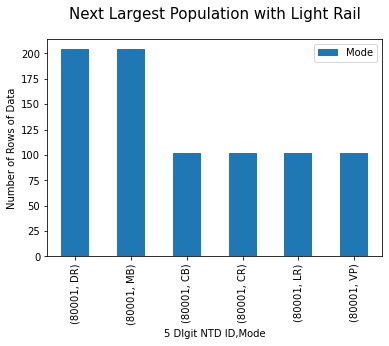

In [19]:
codes_larger = data[data['Primary UZA Code']< 44]
modes_larger = codes_larger[codes_larger['Mode']=='LR']
answer = modes_larger['Primary UZA Code'].max()

answer_info = data[data['Primary UZA Code']==answer]
print(answer_info[['5 DIgit NTD ID', 'Agency', 'Primary UZA Code', 'Primary UZA Population']].head(1))



ax = data[data['Primary UZA Code']==answer].groupby('5 DIgit NTD ID')['Mode'].value_counts().plot(kind='bar',legend=True)
ax.set_title("Next Largest Population with Light Rail", fontsize=15, pad=20)
ax.set_ylabel("Number of Rows of Data")
print("")

In [20]:
pop_Nasvhille = data[data['Primary UZA Code']==44]
pop_Nasvhille = pop_Nasvhille['Primary UZA Population'].max()

pop_next_lr = data[data['Primary UZA Code']==42]
pop_next_lr = pop_next_lr['Primary UZA Population'].max()

pop_difference = pop_next_lr - pop_Nasvhille

pop_difference_perc = (pop_difference/pop_Nasvhille)*100

print('The next largest population with light rail has a population listed as', pop_difference, 'more than Nashville.')
print('This equates to a', pop_difference_perc, "% increase in population over Nashville's current numbers.")

The next largest population with light rail has a population listed as 51656.0 more than Nashville.
This equates to a 5.3276291864474254 % increase in population over Nashville's current numbers.


The next largest population with light rail is the Utah Transit Authority.  Their population is listed as being just over 5% bigger than Nasvhille's.  It is noteable that light rail is the only mode they have that Nashville does not.  

## 2.7 Refining the Dataframe
<a id='2.7_Refining_the_Dataframe'></a>

Since the dataframe is so large, I will remove data now that I know I don't need before I start looking into the relationships between feature.  It will also be necessary to encode some of the categorical data later which will further increase the number of columns.

### 2.7.1 Understanding the Totals Columns
<a id='2.7.1_Understanding_the_Totals_Columns'></a>
**Do the Totals columns truly capture all the related columns of data in the dataframe?**

**Part 1: Collisions**

In [21]:
#Check to see if 'Total Collisions' captures all collision columns

#create a dataframe with all collision columns
collisions = data.iloc[:, 19:26]

#look for rows where 'Total Collisions' does not equal the total of all the other rows with collision data
count_zero = 0
for i in collisions.index:
    if sum(collisions.iloc[i,[6]]) != sum(collisions.iloc[i,0:6]):
        count_zero += 1       

print('There are ',count_zero, 'rows where the total does not match the sum of the individual reports')   

There are  0 rows where the total does not match the sum of the individual reports


The 'Total Collisions' column is straightforward and does truly reflect the total of the other columns of collision data.

**Part 2: Fatalities**

In [22]:
#Check to see if 'Total Fatalities' captures all fatality columns

#create a dataframe with all fatality columns
fatalities = data.iloc[:, 31:48]

count = 0
list = []
count2 = 0
list2 = []
for i in fatalities.index:
    if sum(fatalities.iloc[i,[16]]) != sum(fatalities.iloc[i,0:4]) + sum(fatalities.iloc[i,5:15]):
        count += 1
        list.append(i)
    if sum(fatalities.iloc[i,[16]]) != sum(fatalities.iloc[i,[4]]) + sum(fatalities.iloc[i,[15]]):
        count2 += 1
        list2.append(i)

print('There are ',count, "rows where 'Total Fatalities' does not match the sum of the individual reports")
print('There are ',count2, "rows where 'Total Fatalities' does not match the two subtotal columns")


There are  338 rows where 'Total Fatalities' does not match the sum of the individual reports
There are  365 rows where 'Total Fatalities' does not match the two subtotal columns


In [23]:
list_look = fatalities[fatalities.index == list[1]]
list2_look = fatalities[fatalities.index == list2[1]]
frames = [list_look, list2_look]
df_looks = pd.concat(frames)
df_looks

,Passenger Fatalities,People Waiting or Leaving Fatalities,Operator Fatalities,Other Employee Fatalities,Total Employee Fatalities,Other Worker Fatalities,Bicyclist Fatalities,Pedestrian in Crosswalk Fatalities,Pedestrian Not in Crosswalk Fatalities,Pedestrian Crossing Tracks Fatalities,Pedestrian Walking Along Tracks Fatalities,Other Vehicle Occupant Fatalities,Other Fatalities,Trespasser Fatalities,Suicide Fatalities,Total Other Fatalities,Total Fatalities
15299,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,3
11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


The fatality data is not as straightforward.  One fatality can correctly be reported in more than one column.  For example, one fatality could be both a trespasser fatality and also a suicide fatality as might be the case with index 15299 above.  So, the 338 rows where the totals do not match are explainable.  

The two subtotal columns ('Total Employee Fatalities' and 'Total Other Fatalities') together do not capture all of the other columns as seen in the second example row above (index 11).  Therefore, they are not useful for my purposes.  

Using the 'Total Fatalities' column will be most accurate because it captures the exact number of fatalities without duplication.  

**Part 3: Injuries**

In [24]:
#Check to see if 'Total Injuries' captures all injury columns

#create a dataframe with all injury columns
injuries = data.iloc[:, 48:65]

count3 = 0
list3 = []
count4 = 0
list4 = []
for i in fatalities.index:
    if sum(fatalities.iloc[i,[16]]) != sum(fatalities.iloc[i,0:4]) + sum(fatalities.iloc[i,5:15]):
        count3 += 1
        list3.append(i)
    if sum(fatalities.iloc[i,[16]]) != sum(fatalities.iloc[i,[4]]) + sum(fatalities.iloc[i,[15]]):
        count4 += 1
        list4.append(i)

print('There are ',count3, "rows where 'Total Injuries' does not match the sum of the individual reports")
print('There are ',count4, "rows where 'Total Injuries' does not match the two subtotal columns")

There are  338 rows where 'Total Injuries' does not match the sum of the individual reports
There are  365 rows where 'Total Injuries' does not match the two subtotal columns


In [25]:
list3_look = injuries[injuries.index == list3[1]]
list4_look = injuries[injuries.index == list4[1]]
frames2 = [list3_look, list4_look]
df_looks2 = pd.concat(frames2)
df_looks2

,Passenger Injuries,People Waiting or Leaving Injuries,Operator Injuries,Other Employee Injuries,Total Employee Injuries,Other Worker Injuries,Bicyclist Injuries,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
15299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
11,5,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,8


The injury columns have exactly the same issue that I saw with the fatality columns.

Removing all collision, fatality, and injury columns except 'Total Collisions', 'Total Fatalities', and 'Total Injuries' will allow for a great reduction of the number of columns while still retaining the most valuable data.

### 2.7.2 Removing Unneeded Data
<a id='2.7.2_Removing_Unneeded_Data'></a>

In [26]:
#creating a new dataframe without the '4 Digit NTD ID' column

reduced_data = data.drop(columns=['4 Digit NTD ID'])
reduced_data.shape

(133148, 64)

In [27]:
#removing rows where the modes are not viable choices for Nashville.
#This includes: AR, FB, IP, and PB

reduced_data = reduced_data[~(reduced_data['Mode'].isin(['AR', 'FB','IP','PB']))]
reduced_data.shape


(129779, 64)

In [28]:
reduced_data = reduced_data[~(reduced_data['Primary UZA Code'].isin([602]))]
reduced_data.shape

(129752, 64)

In [29]:
#reduced_data.info()

In [30]:
#removing non-totals columns for collisions, fatalities, and injuries
reduced_data.drop(reduced_data.iloc[:, 47:63], inplace=True, axis=1)
reduced_data.drop(reduced_data.iloc[:, 30:46], inplace=True, axis=1)
reduced_data.drop(reduced_data.iloc[:, 18:24], inplace=True, axis=1)

reduced_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129752 entries, 0 to 133147
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   5 DIgit NTD ID                         129752 non-null  int64  
 1   Agency                                 129752 non-null  object 
 2   Organization Type                      129752 non-null  object 
 3   Mode                                   129752 non-null  object 
 4   Type of Service                        129752 non-null  object 
 5   Rail (Y/N)                             129752 non-null  bool   
 6   Primary UZA Code                       129752 non-null  float64
 7   Primary UZA Name                       129752 non-null  object 
 8   Primary UZA Sq Miles                   129752 non-null  float64
 9   Primary UZA Population                 129752 non-null  float64
 10  Service Area Sq Miles                  129752 non-null  

## 2.8 Exploring Relationships
<a id='2.8_Exploring_Relationships'></a>

### 2.8.1 A Broad Look
<a id='2.8.1_A_Broad_Look'></a>
**What do the data relationships look like with the currect reduced dataframe?**

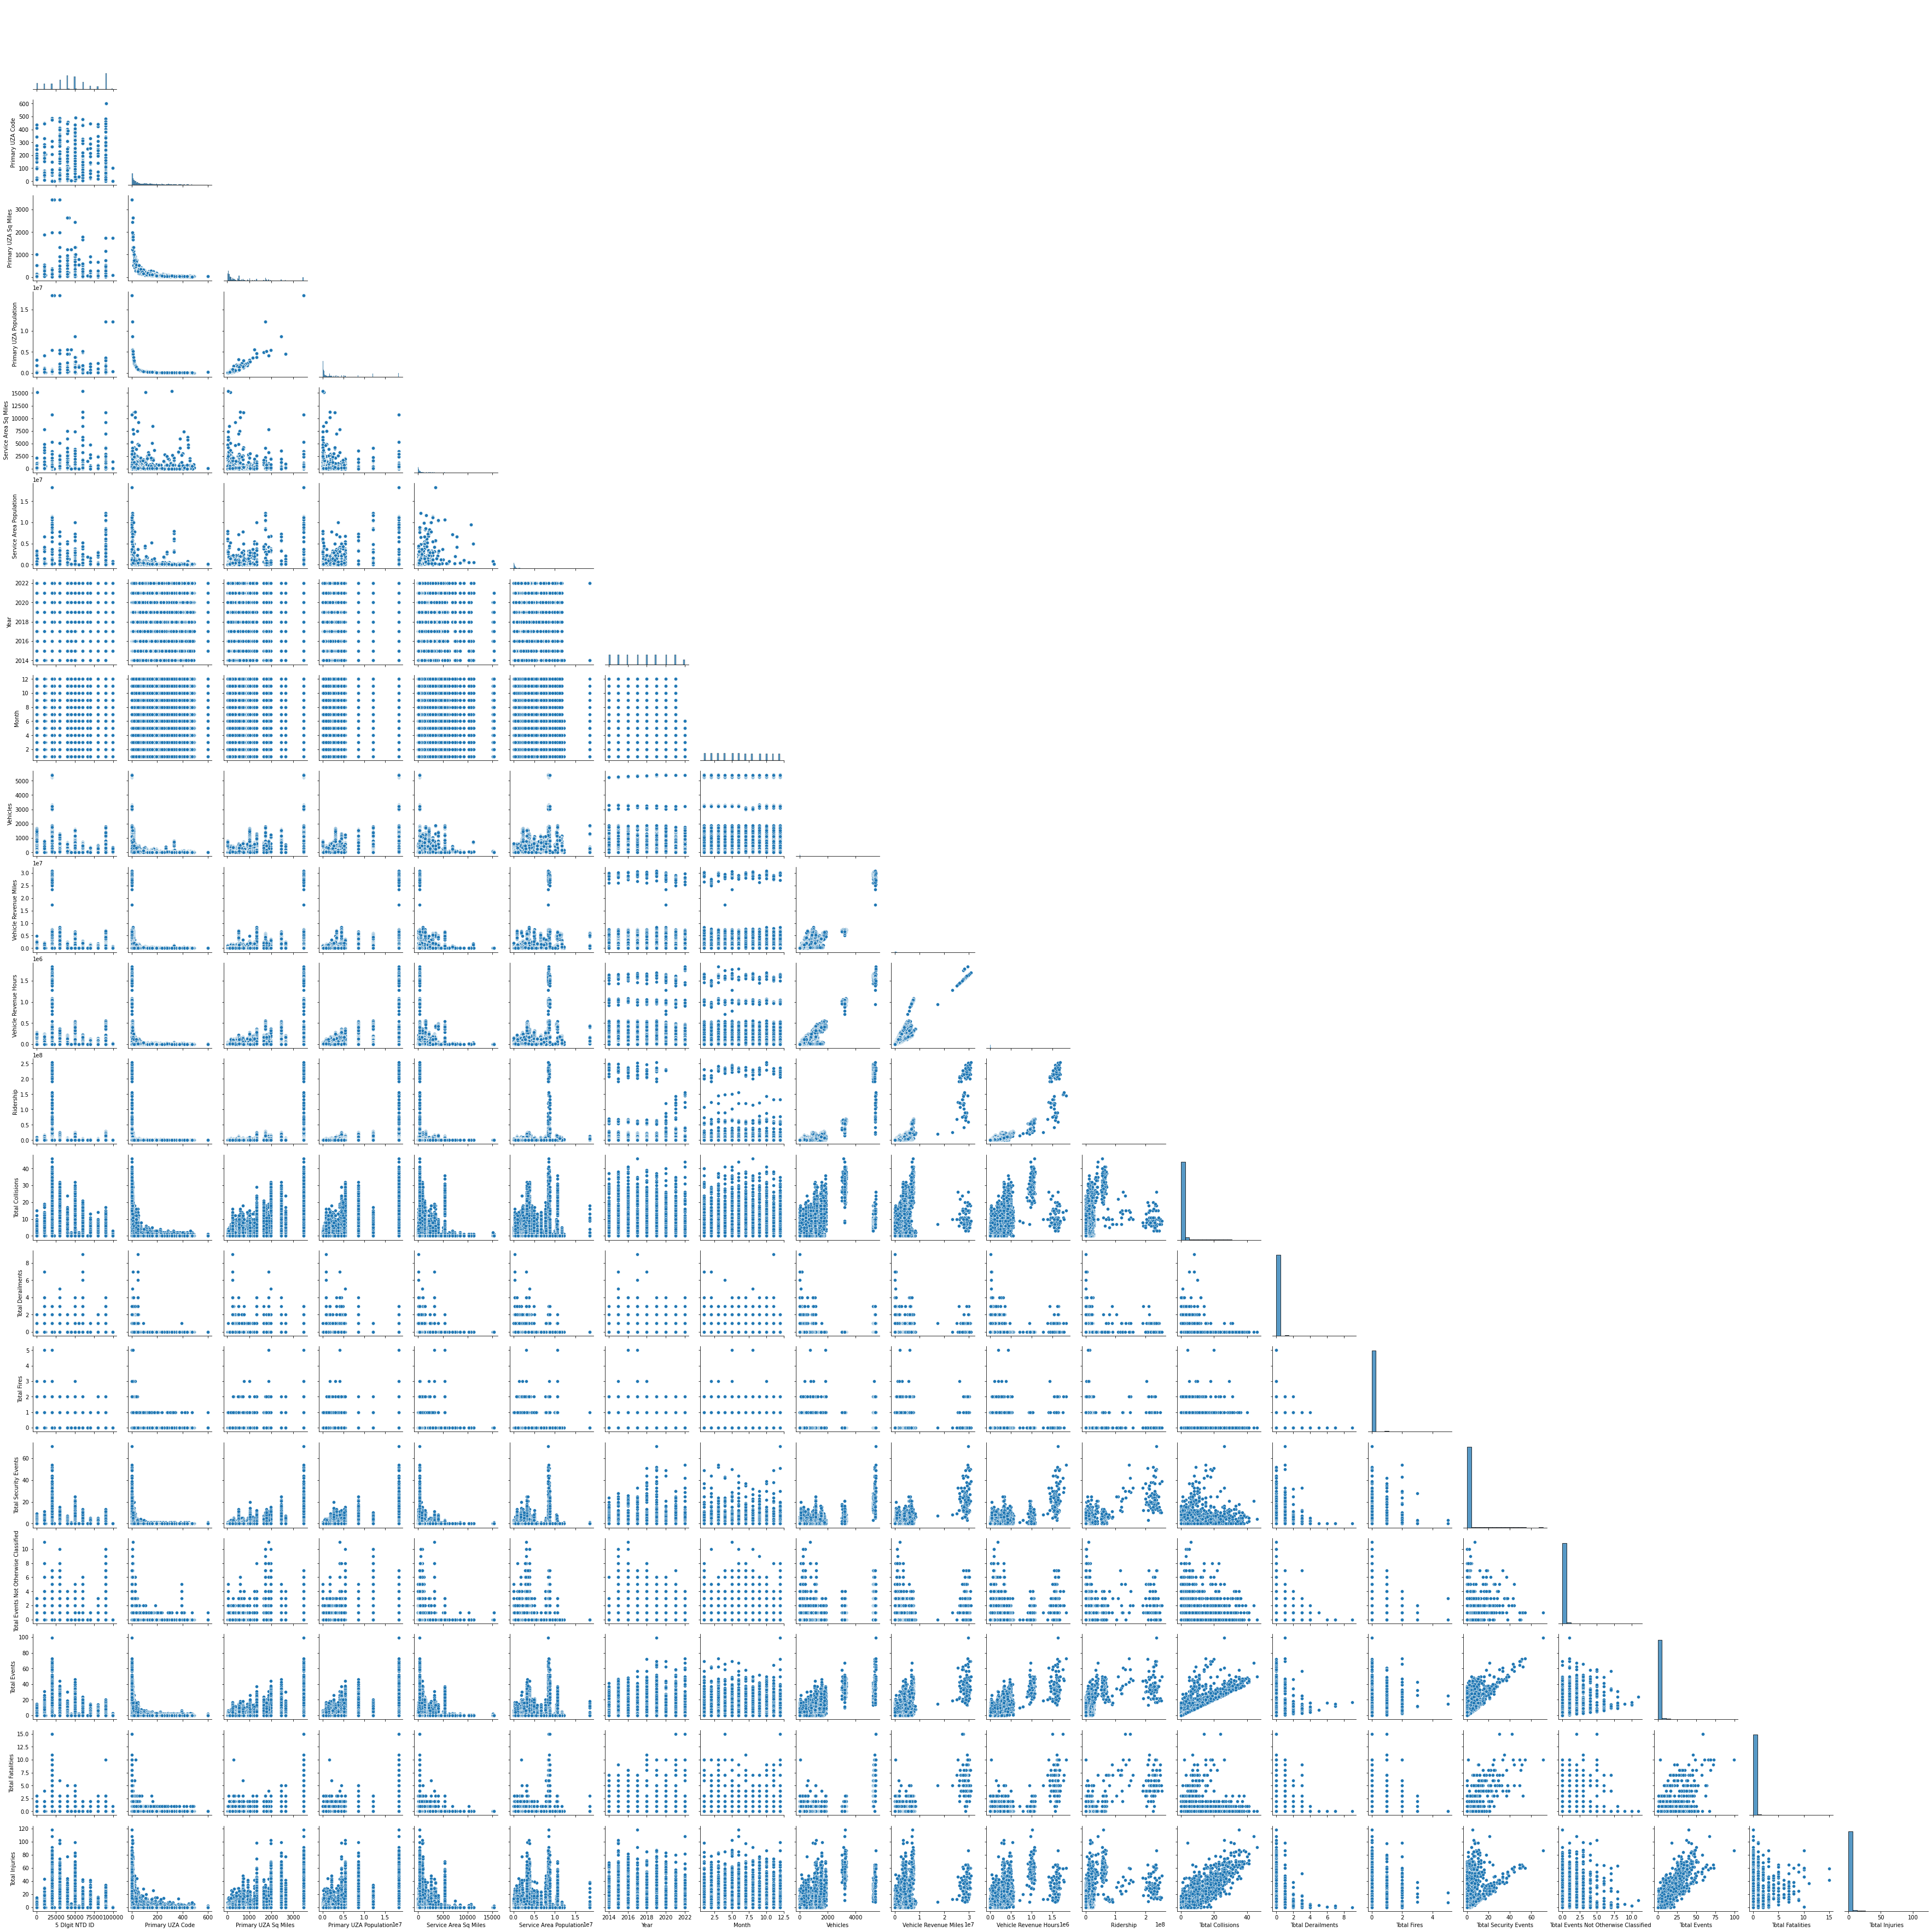

In [31]:
reduced_data_no_bool = reduced_data
reduced_data_no_bool = reduced_data_no_bool.drop(reduced_data_no_bool.iloc[:, [5]], axis=1)

sns.pairplot(reduced_data_no_bool, corner=True)

<AxesSubplot:>

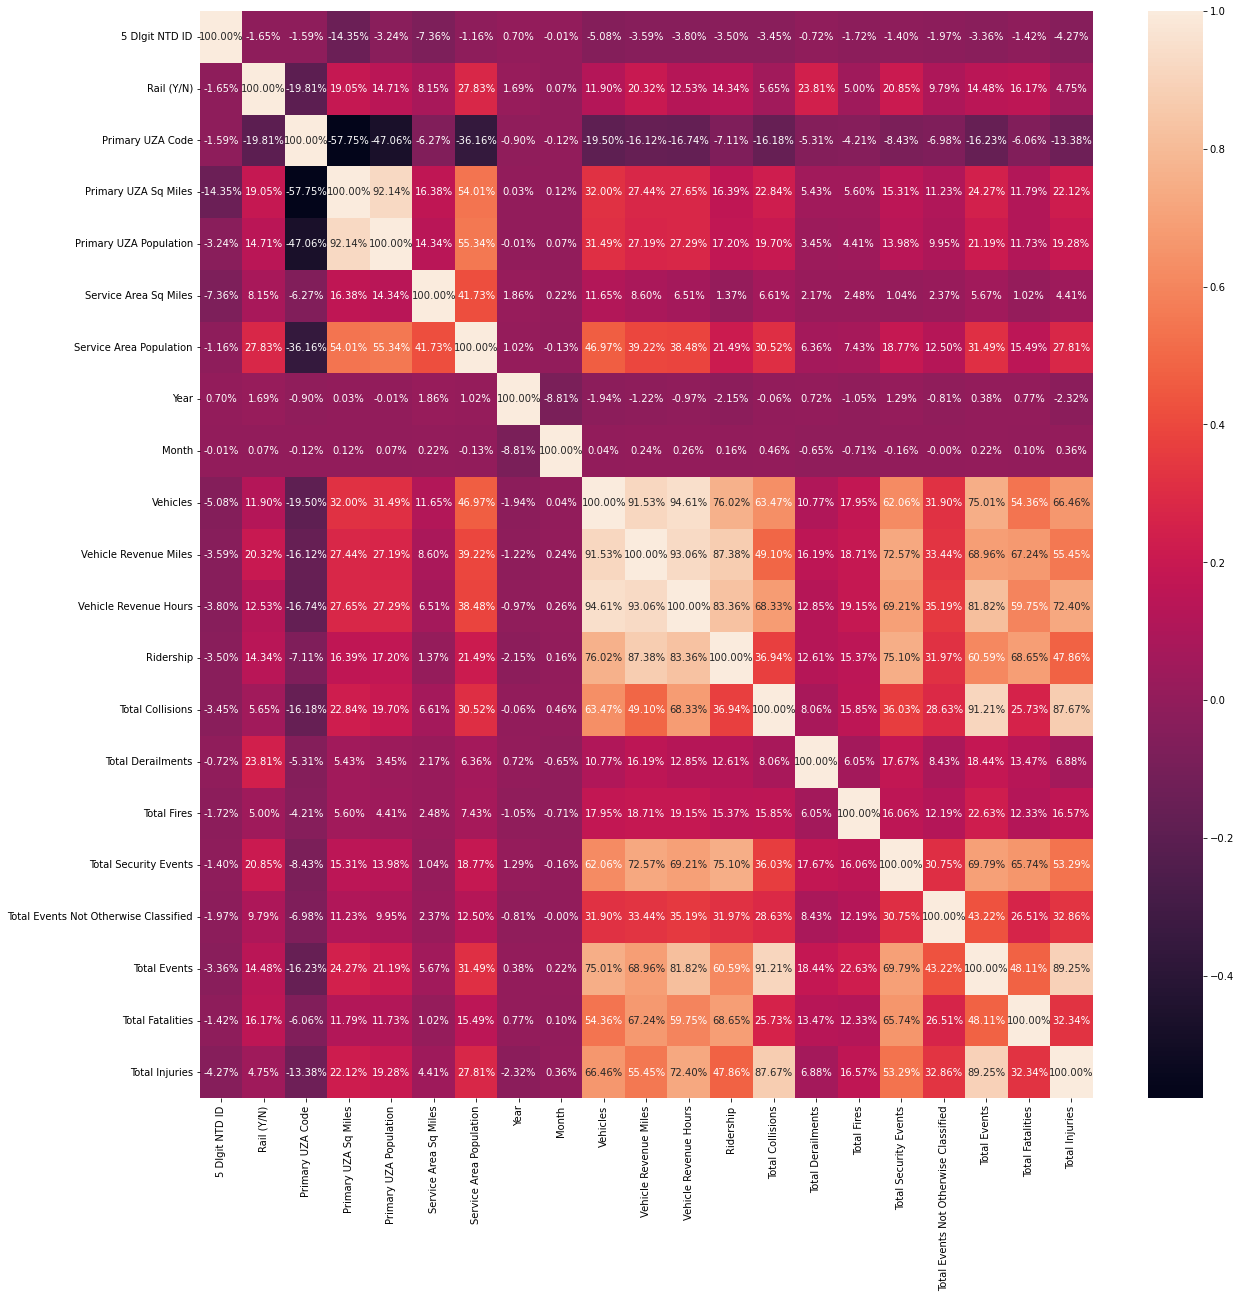

In [32]:
plt.subplots(figsize=(20,20))
sns.heatmap(reduced_data.corr(), annot=True, fmt='.2%')

It is good to get a first glace of relationships between features.  It is interesting the see that 'Total Injuries' and 'Total Collisions' have a strong correlation with 'Total Events' but 'Total Fatalities' does not.  Neither 'Year' nor 'Month' show any correlation with other columns in the dataframe.  The 'Total Derailments' and 'Total Fires' columns also show insignificant correlation with all other columns.  I also notice that there does not seem to be a significant correlation between 'Primary UZA Population' and the other columns.  So, this information starts to shape my idea of what data will be useful to consider for determining a safe mode of transportation for Nashville.

### 2.8.2 Relationship between Mode and Total Collisions, Fatalities, and Injuries
<a id='2.8.2_Relationship_between_Mode_and_Total_Collisions_Fatalities_and_Injuries'></a>
**What is the relationship between the mode of transportation and the total number of collisions, fatalities, and injuries?**

In [33]:
mode_and_totals = reduced_data[['Mode','Total Collisions','Total Fatalities','Total Injuries']]
mode_and_totals.head()

,Mode,Total Collisions,Total Fatalities,Total Injuries
0,LR,1,0,1
1,MB,4,0,11
2,DR,11,0,17
3,HR,8,2,9
4,MB,29,1,42


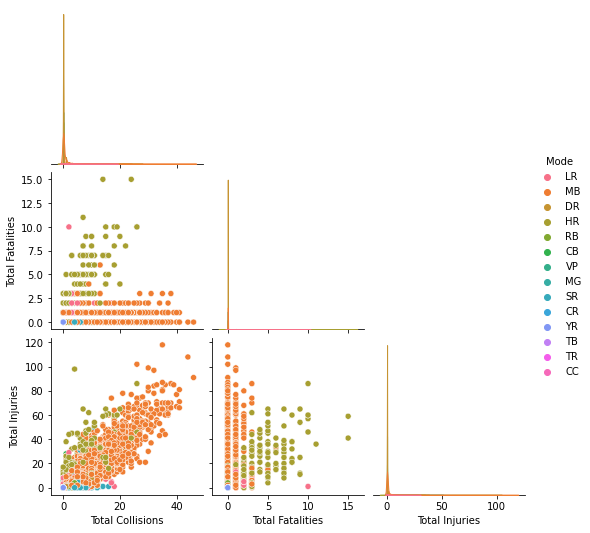

In [34]:
sns.pairplot(mode_and_totals, hue='Mode', corner=True)

<AxesSubplot:>

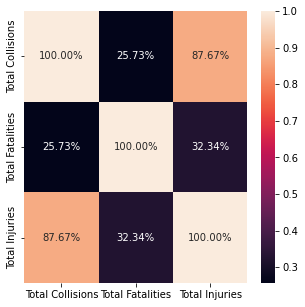

In [35]:
plt.subplots(figsize=(5,5))
sns.heatmap(mode_and_totals.corr(), annot=True, fmt='.2%')

Some rudimentary relationships can be seen here but I will need to encode the modes column in order to gain more insight.  I will handle that in the next notebook.

### 2.8.3 Relationship between Features for Nashville Specifically
<a id='2.8.3_Relationship_between_Features_for_Nashville_Specifically'></a>

In [36]:
Nashville_data = reduced_data[(reduced_data['5 DIgit NTD ID'].isin([40178, 40004, 40159]))]
Nashville_data.describe()

,5 DIgit NTD ID,Primary UZA Code,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year,Month,Vehicles,Vehicle Revenue Miles,Vehicle Revenue Hours,Ridership,Total Collisions,Total Derailments,Total Fires,Total Security Events,Total Events Not Otherwise Classified,Total Events,Total Fatalities,Total Injuries
count,750.000000,750.0,750.0,750.0,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.0,750.000000,750.000000,750.0,750.000000,750.000000,750.000000
mean,40090.904000,44.0,563.0,969587.0,1494.856000,1.216144e+06,2017.656000,6.332000,42.538667,117236.684000,7748.25200,102767.350667,0.210667,0.0,0.004000,0.004000,0.0,0.218667,0.010667,0.380000
std,79.849433,0.0,0.0,0.0,2307.369812,5.123273e+05,2.461248,3.450263,38.606335,150727.360341,12879.89757,232536.958736,0.612198,0.0,0.063161,0.063161,0.0,0.628791,0.102796,1.356732
min,40004.000000,44.0,563.0,969587.0,484.000000,6.266810e+05,2014.000000,1.000000,4.000000,4538.000000,113.00000,872.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,40004.000000,44.0,563.0,969587.0,484.000000,6.912430e+05,2016.000000,3.000000,18.000000,25901.000000,803.75000,7704.500000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,40159.000000,44.0,563.0,969587.0,750.000000,1.583115e+06,2018.000000,6.000000,29.000000,47146.000000,1299.50000,14657.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40159.000000,44.0,563.0,969587.0,750.000000,1.583115e+06,2020.000000,9.000000,51.000000,157845.000000,10412.50000,25214.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,40178.000000,44.0,563.0,969587.0,7505.000000,1.978890e+06,2022.000000,12.000000,157.000000,559186.000000,46452.00000,899840.000000,5.000000,0.0,1.000000,1.000000,0.0,5.000000,1.000000,14.000000


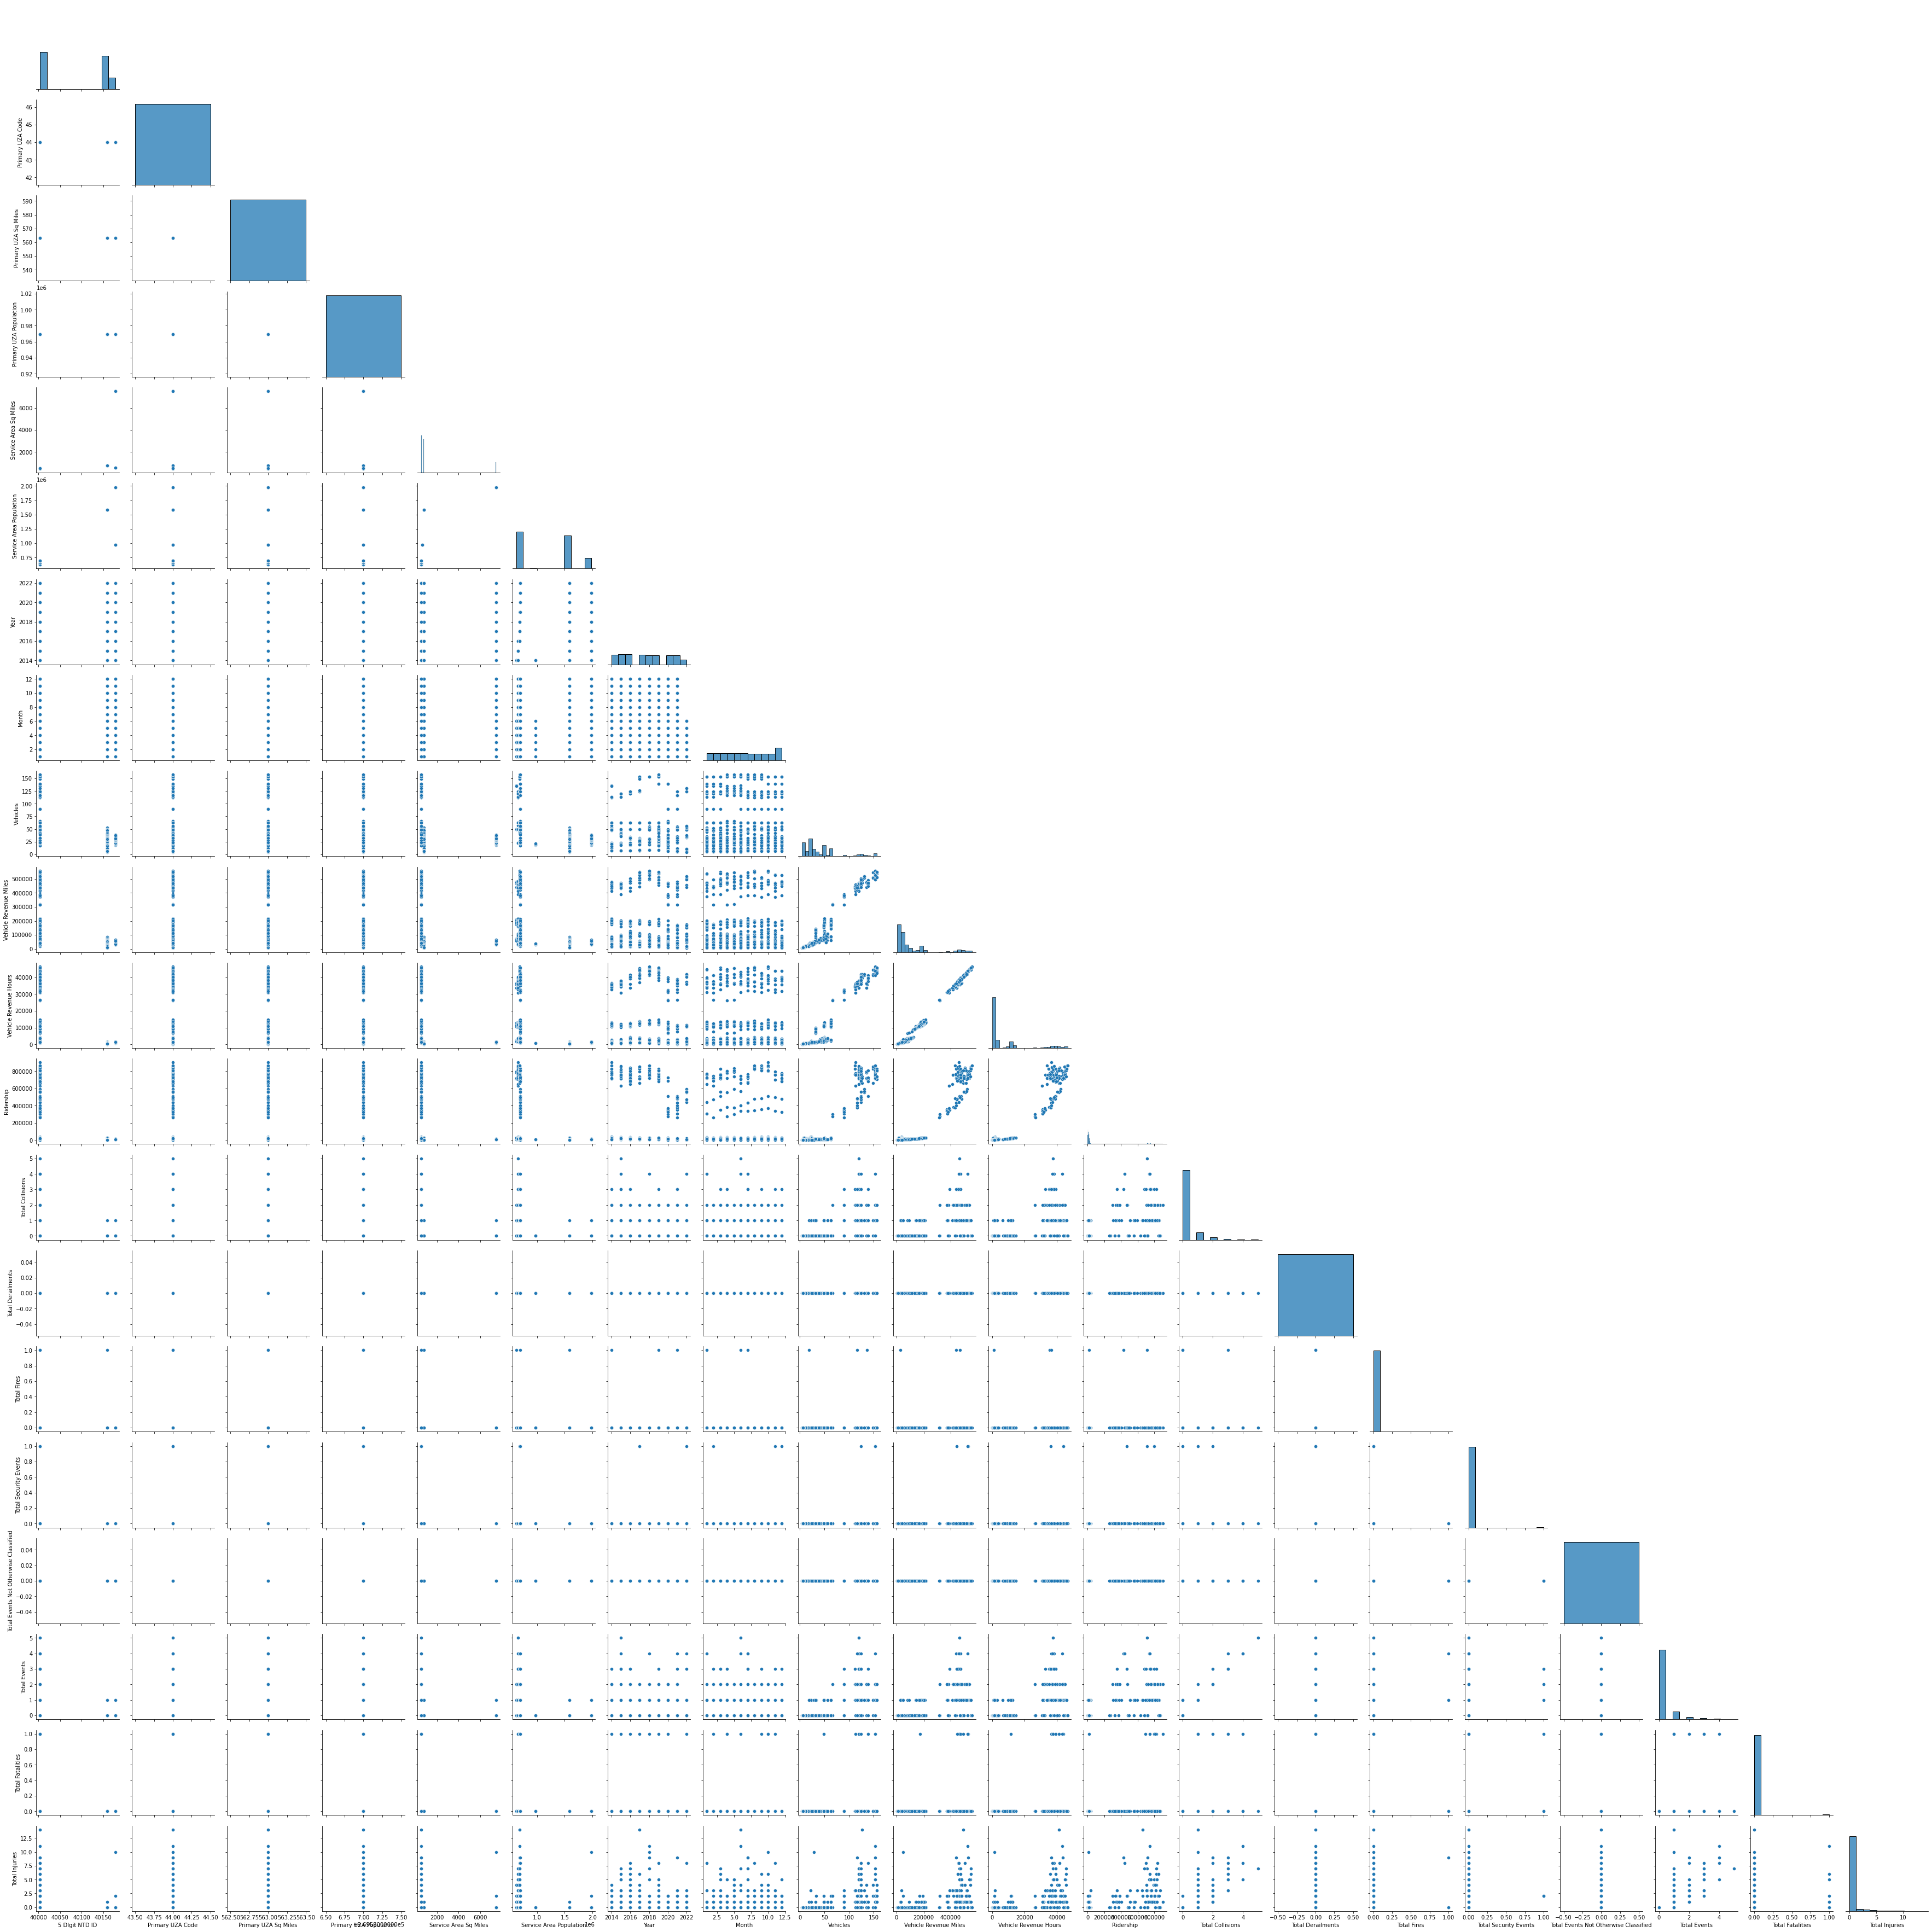

In [37]:
Nashville_data_no_bool = Nashville_data
Nashville_data_no_bool = Nashville_data_no_bool.drop(Nashville_data_no_bool.iloc[:, [5]], axis=1)

sns.pairplot(Nashville_data_no_bool, corner=True)

<AxesSubplot:>

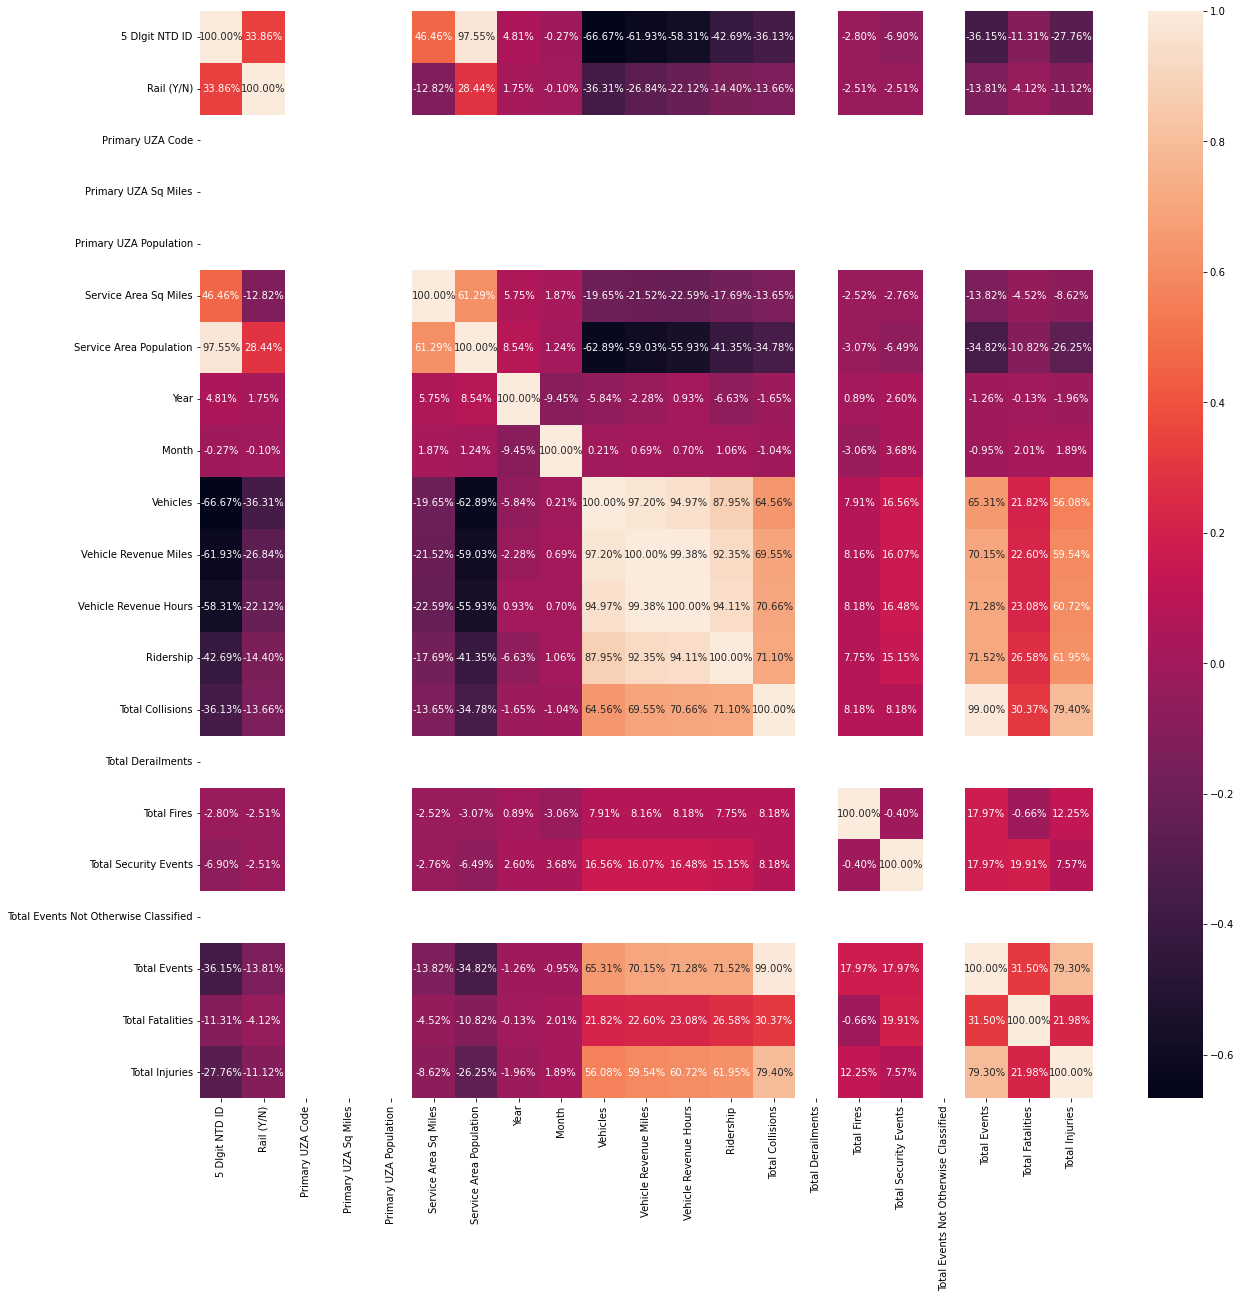

In [38]:
plt.subplots(figsize=(20,20))
sns.heatmap(Nashville_data.corr(), annot=True, fmt='.2%')

Nashville only has a single value for it's UZA columns and also, apparaently, has zero 'Total Derailments' and 'Total Events Not Otherwise Classified' for the entire dataframe.  So, we see no values in the heatmap for those columns.  Nashville shows a very strong correlation between 'Total Collisions' and 'Total Events' but the correlation between both 'Total Injuries' and 'Total Fatalities' with 'Total Events' are less strong than they were in the National data.

## 2.9 Save Data
<a id='2.9_Save_Data'></a>

In [39]:
reduced_data.to_csv("reduced_data.csv", index=False)

In [40]:
Nashville_data.to_csv("Nashville_data.csv", index=False)

## 2.10 Summary
<a id='2.10_Summary'></a>

This notebook opened with a clean dataframe of 133148 rows and 65 columns.  After exploring the data, I determined all columns referring to collisions, fatalities, and injuries could be discarded with the exception of 'Total Collisions', 'Total Fatalities', and 'Total Injuries.'  The '4 Digit NTD ID' column was also discarded since it does not add value to our dataframe.  All rows for 'Primary UZA Code' 602 were discarded because 602 was found to be a non-UZA entity.  'Primary UZA Code' 601 was retained.  All rows of data for modes 'AR', 'FB', 'IP', and 'PB' were discarded because these are not viable options for Nashville.  I now have one dataframe (reduced_data) with 129752 rows and 26 columns, and a separate dataframe (Nashville_Data) containing 750 rows and 26 columns of Nashville-specific data.

I was able to take a first look at the relationships between some of the features and was interested to see the correlation between 'Total Collisions' and 'Total Injuries' with 'Total Events' was markedly higher than that between 'Total Fatalities' and 'Total Events'.  In the Nashville-specific data, the correlation between 'Total Injuries' and 'Total Events' was less strong.

In the next notebook, I will encode the modes and then dive deeper into the relationship between them and the other features.